# XOR Cipher

This notebook is a simple example demonstrating how a neural network can be used to solve/break encryption systems that are equivalent to simple transformations.

In [1]:
import numpy as np
from hashlib import sha1
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import Model
import random

#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

In [2]:
def xor_encrypt(k, p):
    cipher = []
    for i,c in enumerate(p):
        cipher.append(c ^ ord(k[i%len(k)]))
    return cipher

def data_generator():
    charset = 'abcdefghijklmnopqrstuvwxyz ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789.,!?'
    key = "This is the key"
    while True:
        string = "".join([c for i in range(0,16) for c in charset[random.randrange(len(charset))]]).encode('ascii')
        string_bytes = np.array(bytearray(string)).astype(np.int32)
        cipher_bytes = np.array(xor_encrypt(key, string)).astype(np.int32)
        x = cipher_bytes
        y = string_bytes
        yield x, y

generator = data_generator()
dataset = tf.data.Dataset.from_generator(data_generator, 
                output_signature=(
                    tf.TensorSpec(shape=(16,), dtype=tf.int32),
                    tf.TensorSpec(shape=(16,), dtype=tf.int32)
                ))

#dataset.batch(32)
training_history = []

In [3]:
inputs = Input(shape=(16,))
dense = Dense(256, activation='relu')(inputs)
dense = Dense(256, activation='relu')(dense)
dense = Dense(256, activation='relu')(dense)
dense = Dense(256, activation='relu')(dense)
dense = Dense(256, activation='relu')(dense)
outputs = Dense(16)(dense)

model = Model(inputs=inputs, outputs=outputs, name='xor')
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "xor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense (Dense)                (None, 256)               4352      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 16)                4112    

In [4]:
history = []
for i in range(25):
    epoch_count = 0
    epoch_accuracy = 0.0
    epoch_loss = 0.0
    for X,y in dataset.batch(64).take(50000):
        X = np.array(X).reshape(-1,16)
        y = np.array(y).reshape(-1,16)
        hist = model.train_on_batch(X, y=y)
        epoch_count = epoch_count + 1
        epoch_accuracy += hist[1]
        epoch_loss += hist[0]
        if(epoch_count % 10000 == 0):
            print(f"\t[Step: {epoch_count} Accuracy: {epoch_accuracy / epoch_count} Loss: {epoch_loss / epoch_count} ]")
    print(f"[Epoch: {i} Accuracy: {epoch_accuracy / epoch_count} Loss: {epoch_loss / epoch_count}]")
    history.append((epoch_loss/epoch_count, epoch_accuracy/epoch_count))

	[Step: 10000 Accuracy: 0.2277796875 Loss: 194.66472096252443 ]
	[Step: 20000 Accuracy: 0.2830875 Loss: 139.94420139694213 ]
	[Step: 30000 Accuracy: 0.3190203125 Loss: 111.96143207931519 ]
	[Step: 40000 Accuracy: 0.341781640625 Loss: 96.38515496683121 ]
	[Step: 50000 Accuracy: 0.359351875 Loss: 86.36538277431488 ]
[Epoch: 0 Accuracy: 0.359351875 Loss: 86.36538277431488]
	[Step: 10000 Accuracy: 0.4678671875 Loss: 42.50314998245239 ]
	[Step: 20000 Accuracy: 0.4822078125 Loss: 41.22220460090637 ]
	[Step: 30000 Accuracy: 0.48955885416666667 Loss: 40.48513981730143 ]
	[Step: 40000 Accuracy: 0.495740625 Loss: 39.85868877191544 ]
	[Step: 50000 Accuracy: 0.5008734375 Loss: 39.332135359420775 ]
[Epoch: 1 Accuracy: 0.5008734375 Loss: 39.332135359420775]
	[Step: 10000 Accuracy: 0.5259 Loss: 36.91999279212952 ]
	[Step: 20000 Accuracy: 0.52836875 Loss: 36.47172399778366 ]
	[Step: 30000 Accuracy: 0.5309708333333333 Loss: 35.898949350802106 ]
	[Step: 40000 Accuracy: 0.533944140625 Loss: 35.3152461192

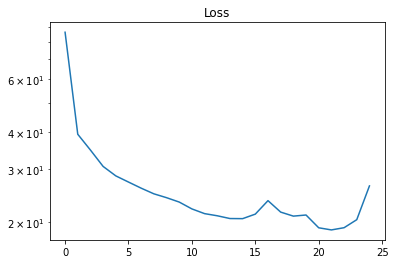

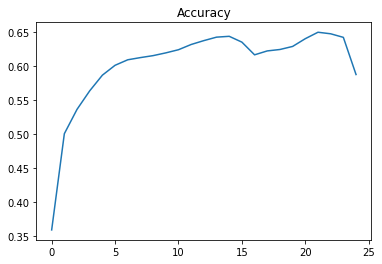

In [5]:
import matplotlib.pyplot as plt

hist = np.array(history)
plt.title("Loss")
plt.plot(hist[:,0])
plt.yscale('log')
plt.show()
plt.title("Accuracy")
plt.plot(hist[:,1])
plt.show()


In [6]:
encrypted_text = xor_encrypt("This is the key", b'This is a test!!')

In [7]:
pred = model.predict([encrypted_text])
guess = "".join([chr(i) for i in pred.astype(np.uint16)[0]])
print(guess)

Wnpt%ov%n#sevr,(


84 104 105 115 32 105 115 32 97 32 116 101 115 116 33 33
87 110 112 116 37 111 118 37 110 35 115 101 118 114 44 40


In [ ]:
print(" ".join([str(ord(c)) for c in "This is a test!!"]))
print(" ".join([str(ord(c)) for c in guess]))

In [9]:
#model.save("XOR.h5")

While the decryption is far from perfect, we can see that, again, a simple transformation function is not enough to provide strongly encrypted data